In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
import scipy.stats as stats

In [46]:
% matplotlib inline

# Read Data From Database

In [2]:
import MySQLdb

In [3]:
mysql_cn= MySQLdb.connect(host='spider.c0kwpumescj5.us-east-1.rds.amazonaws.com', 
                port=3306,user='root', passwd='Zuoqian690712', 
                db='spider')
car_fax = pd.read_sql('select * from carfax;', con=mysql_cn) 

print 'loaded {} records from MySQL into dataframe:'.format(len(car_fax)) 
mysql_cn.close()

loaded 1062477 records from MySQL into dataframe:


In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
car_fax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062477 entries, 0 to 1062476
Data columns (total 29 columns):
dealer_id             1062477 non-null object
dealer_name           1062477 non-null object
dealer_city           1062477 non-null object
dealer_state          1062477 non-null object
car_vin               1062477 non-null object
car_year              1062477 non-null int64
car_make              1062477 non-null object
car_topOptions        1062477 non-null object
car_model             1062477 non-null object
car_trim              1062477 non-null object
car_mileage           1062477 non-null int64
car_list_price        1062477 non-null float64
car_current_price     1062477 non-null float64
car_exteriorColor     1062477 non-null object
car_interiorColor     1062477 non-null object
car_engine            1062477 non-null object
car_displacement      1062477 non-null object
car_drivetype         1062477 non-null object
car_transmission      1062477 non-null object
car_fuel     

In [7]:
car_fax.describe()

,car_year,car_mileage,car_list_price,car_current_price,car_mpgCity,car_mpgHighway,car_mpgCombined,car_oneOwner,car_noAccidents,car_serviceRecords,car_personalUse
count,"1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00","1,062,477.00"
mean,"2,012.90","56,441.57","20,187.67","20,191.42",19.26,26.17,21.78,0.61,0.81,0.90,0.67
std,4.01,"45,768.92","17,068.02","17,056.76",7.48,8.50,7.73,0.49,0.39,0.30,0.47
min,"1,981.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,011.00","23,944.00","10,995.00","10,996.00",16.00,22.00,18.00,0.00,1.00,1.00,0.00
50%,"2,014.00","42,385.00","17,598.00","17,597.00",19.00,26.00,21.00,1.00,1.00,1.00,1.00
75%,"2,016.00","79,886.00","26,950.00","26,938.00",23.00,31.00,26.00,1.00,1.00,1.00,1.00
max,"2,018.00","494,888.00","2,299,900.00","2,299,900.00",150.00,122.00,136.00,1.00,1.00,1.00,1.00


In [11]:
is_current_price = car_fax['car_list_price']!=0

In [12]:
is_current_price.value_counts()

True     981050
False     81427
Name: car_list_price, dtype: int64

In [13]:
is_car_mpgCity = car_fax['car_mpgCity']!=0

In [14]:
is_car_mpgCity.value_counts()

True     1016570
False      45907
Name: car_mpgCity, dtype: int64

In [15]:
is_car_mpgHighway = car_fax['car_mpgHighway']!=0

In [16]:
is_car_mpgHighway.value_counts()

True     1016570
False      45907
Name: car_mpgHighway, dtype: int64

In [17]:
is_car_mpgCombined = car_fax['car_mpgCombined']!=0

In [19]:
is_car_mpgCombined.value_counts()

True     1016570
False      45907
Name: car_mpgCombined, dtype: int64

In [22]:
car_fax_clean = car_fax[is_current_price & is_car_mpgCity & is_car_mpgHighway &is_car_mpgCombined]

In [30]:
car_fax_clean['dealer_state'].apply(lambda x : x if x!='DC' else 'MD')

69         SC
70         IN
71         HI
72         AZ
73         CA
74         FL
75         CA
76         AZ
77         AZ
78         FL
79         MA
80         TX
81         FL
82         CA
84         CA
86         NJ
87         FL
88         WA
89         CA
90         NV
91         UT
92         IL
93         IL
94         IL
95         TX
96         NH
97         TX
98         IL
99         MD
100        TN
           ..
1062445    OH
1062446    NJ
1062447    NJ
1062448    NJ
1062449    NJ
1062450    CT
1062451    FL
1062452    TX
1062453    CT
1062454    NJ
1062455    IL
1062456    IN
1062457    IN
1062458    TX
1062459    PA
1062460    FL
1062461    NJ
1062462    NJ
1062463    TX
1062464    NJ
1062465    NJ
1062466    NY
1062469    NY
1062470    FL
1062471    FL
1062472    CT
1062473    FL
1062474    NJ
1062475    NC
1062476    CT
Name: dealer_state, Length: 939336, dtype: object

In [32]:
car_fax_clean['dealer_state'].nunique()

50

Anova Test for Current Price in Each State
===
Null Hypothesis: current price of all used car are the same in each state.

Alternative Hypothesis: At least one of states has different current price. 

In [33]:
car_fax_state = car_fax_clean.groupby(by=['dealer_state'])

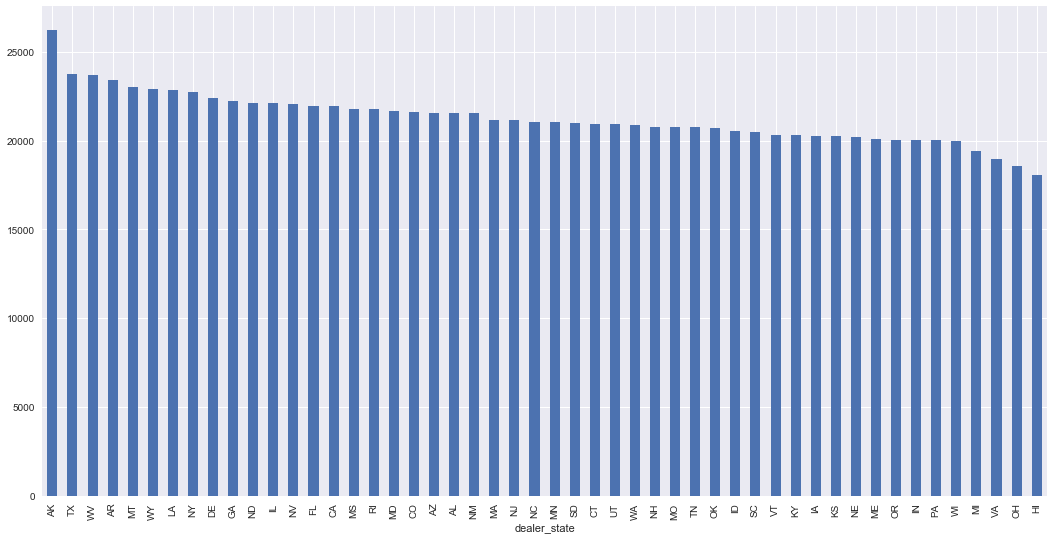

In [49]:
fig,ax = plt.subplots(figsize = (18,9))
car_fax_state['car_current_price'].mean().sort_values(ascending=False).plot(kind = 'bar', ax = ax)

In [37]:
state_prices = []
for state in car_fax_state.groups.keys():
    state_prices.append(car_fax_state.get_group(state)['car_current_price'])

In [42]:
stats.f_oneway(*state_prices)

F_onewayResult(statistic=133.35969540946746, pvalue=0.0)

# Kruskal-Wallis H-test for Used Car Current Price of Each State -> non-parametric version of ANOVA

In [53]:
stats.kruskal(*state_prices)

KruskalResult(statistic=11554.805085946771, pvalue=0.0)

# T-test to examine wether there is significant in used car current price difference between NC, MN, and MA

In [ ]:
NC_current_price_list = car_fax_state.get_group('NC')['car_current_price']
MN_current_price_list = car_fax_state.get_group('MN')['car_current_price']
MA_current_price_list = car_fax_state.get_group('MA')['car_current_price']
TX_current_price_list = car_fax_state.get_group('TX')['car_current_price']
GA_current_price_list = car_fax_state.get_group('GA')['car_current_price']

In [62]:
stats.ttest_ind(NC_current_price_list, MA_current_price_list, equal_var = False)

Ttest_indResult(statistic=-0.70074936008036637, pvalue=0.4834627051900301)

In [60]:
stats.ttest_ind(NC_current_price_list, MN_current_price_list, equal_var = False)

Ttest_indResult(statistic=0.14193675291315261, pvalue=0.88713098501032528)

In [64]:
stats.ttest_ind(TX_current_price_list, MN_current_price_list, equal_var = False)

Ttest_indResult(statistic=21.252549857988786, pvalue=3.3382626684204326e-99)

In [68]:
stats.ttest_ind(TX_current_price_list, NC_current_price_list, equal_var = False)

Ttest_indResult(statistic=26.42550234152786, pvalue=3.3637897103644611e-153)

In [75]:
stats.ttest_ind(GA_current_price_list, NC_current_price_list, equal_var = False)

Ttest_indResult(statistic=10.382716949298038, pvalue=3.0984910105918844e-25)

Anova Test for Current Price of Diffrent Used Car BodyTypes
===
Null Hypothesis: current price of all used car are the same in each car bodytype.

Alternative Hypothesis: At least one of car bodytypes has different current price. 

In [54]:
car_fax_bodytype = car_fax_clean.groupby(by=['car_bodytype'])

In [55]:
car_fax_bodytype['car_current_price'].mean()

car_bodytype
Chassis        7,599.46
Convertible   32,054.42
Coupe         29,130.60
Hatchback     13,765.31
Minivan       17,472.75
Pickup        25,782.21
SUV           23,661.64
Sedan         17,286.97
Unspecified   45,866.50
Van           18,049.39
Wagon         15,891.02
Name: car_current_price, dtype: float64

In [85]:
bodytype_prices = []
for bodytype in car_fax_bodytype.groups.keys():
    bodytype_prices.append(car_fax_bodytype.get_group(bodytype)['car_current_price'])

In [86]:
stats.f_oneway(*bodytype_prices)

F_onewayResult(statistic=7315.9369146209883, pvalue=0.0)

# T-test to examine wether there is significant in used car current price difference between Sedan and Wagon

In [82]:
Sedan_current_price_list = car_fax_bodytype.get_group('Sedan')['car_current_price']
Wagon_current_price_list = car_fax_bodytype.get_group('Wagon')['car_current_price']

In [83]:
stats.ttest_ind(Sedan_current_price_list, Wagon_current_price_list, equal_var = False)

Ttest_indResult(statistic=21.265494356676697, pvalue=1.8204812312155453e-99)

In [81]:
print("{0:.2f}".format(1.8204812312155453e-99))

0.00


# Kruskal-Wallis H-test for Used Car Current Price of Different Bodytypes -> non-parametric version of ANOVA

In [58]:
stats.kruskal(*bodytype_prices)

KruskalResult(statistic=123890.21222802582, pvalue=0.0)

# Anova test for Impact of Different Exterior Colors in Current Price

In [84]:
car_fax_exteriorColor = car_fax_clean.groupby(by=['car_exteriorColor'])
exteriorColor_prices = []
for exterior_color in car_fax_exteriorColor.groups.keys():
    exteriorColor_prices.append(car_fax_exteriorColor.get_group(exterior_color)['car_current_price'])

In [88]:
car_fax_exteriorColor['car_current_price'].mean()

car_exteriorColor
Beige         16,877.54
Black         23,622.24
Blue          19,323.56
Bronze        21,200.57
Brown         22,543.62
Burgundy      14,691.00
Gold          13,573.19
Gray          21,133.22
Green         16,873.46
Orange        23,183.61
Pink          11,303.21
Purple        21,592.71
Red           20,363.74
Silver        19,581.50
Turquoise     11,697.69
Unspecified   20,126.24
White         23,034.52
Yellow        28,190.37
Name: car_current_price, dtype: float64

In [87]:
stats.f_oneway(*exteriorColor_prices)

F_onewayResult(statistic=924.95071323068032, pvalue=0.0)

# T-test to examine wether there is significant difference in used car current price between White Exterior and Black Exterior

In [89]:
Exterior_white_prices = car_fax_exteriorColor.get_group('White')['car_current_price']
Exterior_black_prices = car_fax_exteriorColor.get_group('Black')['car_current_price']

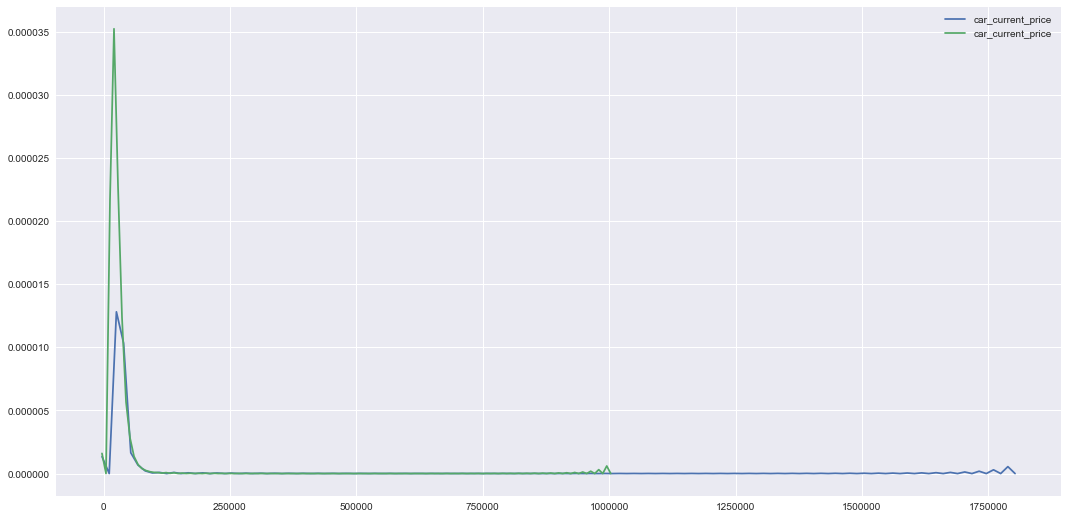

In [106]:
fig,ax = plt.subplots(figsize = (18,9))
sns.kdeplot(Exterior_white_prices,ax = ax)
sns.kdeplot(Exterior_black_prices,ax = ax)

In [103]:
stats.ttest_ind(Exterior_white_prices.values, Exterior_black_prices.values, equal_var = False)

Ttest_indResult(statistic=-10.936287110006834, pvalue=7.8046833668766083e-28)

In [107]:
print("{0:.2f}".format(7.8046833668766083e-28))

0.00


In [10]:
car_fax.columns

Index([u'dealer_id', u'dealer_name', u'dealer_city', u'dealer_state',
       u'car_vin', u'car_year', u'car_make', u'car_topOptions', u'car_model',
       u'car_trim', u'car_mileage', u'car_list_price', u'car_current_price',
       u'car_exteriorColor', u'car_interiorColor', u'car_engine',
       u'car_displacement', u'car_drivetype', u'car_transmission', u'car_fuel',
       u'car_mpgCity', u'car_mpgHighway', u'car_mpgCombined', u'car_bodytype',
       u'car_oneOwner', u'car_noAccidents', u'car_serviceRecords',
       u'car_personalUse', u'crawl_time'],
      dtype='object')